In [46]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os


os.makedirs('visuals', exist_ok=True)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             roc_curve, precision_recall_curve, average_precision_score)


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

df = pd.read_csv('/kaggle/input/spotify-data/dataset.csv')
print(f"  {df.shape[0]:,} x {df.shape[1]} ")

## dataset check


for i, col in enumerate(df.columns, 1):
    print(f"col names{i:2}. {col}")


dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"types{dtype}: {count} columns")



display(df.head())





/kaggle/input/spotify-data/dataset.csv
  114,000 x 21 
col names 1. Unnamed: 0
col names 2. track_id
col names 3. artists
col names 4. album_name
col names 5. track_name
col names 6. popularity
col names 7. duration_ms
col names 8. explicit
col names 9. danceability
col names10. energy
col names11. key
col names12. loudness
col names13. mode
col names14. speechiness
col names15. acousticness
col names16. instrumentalness
col names17. liveness
col names18. valence
col names19. tempo
col names20. time_signature
col names21. track_genre
typesfloat64: 9 columns
typesint64: 6 columns
typesobject: 5 columns
typesbool: 1 columns


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000
mean,33.239,0.567,0.641,-8.259,0.085,0.315,0.156,0.214,0.474,122.148,228029.153
std,22.305,0.174,0.252,5.029,0.106,0.333,0.310,0.190,0.259,29.978,107297.713
min,0.000,0.000,0.000,-49.531,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,17.000,0.456,0.472,-10.013,0.036,0.017,0.000,0.098,0.260,99.219,174066.000
50%,35.000,0.580,0.685,-7.004,0.049,0.169,0.000,0.132,0.464,122.017,212906.000
75%,50.000,0.695,0.854,-5.003,0.084,0.598,0.049,0.273,0.683,140.071,261506.000
max,100.000,0.985,1.000,4.532,0.965,0.996,1.000,1.000,0.995,243.372,5237295.000


  • Average popularity: 33.2/100


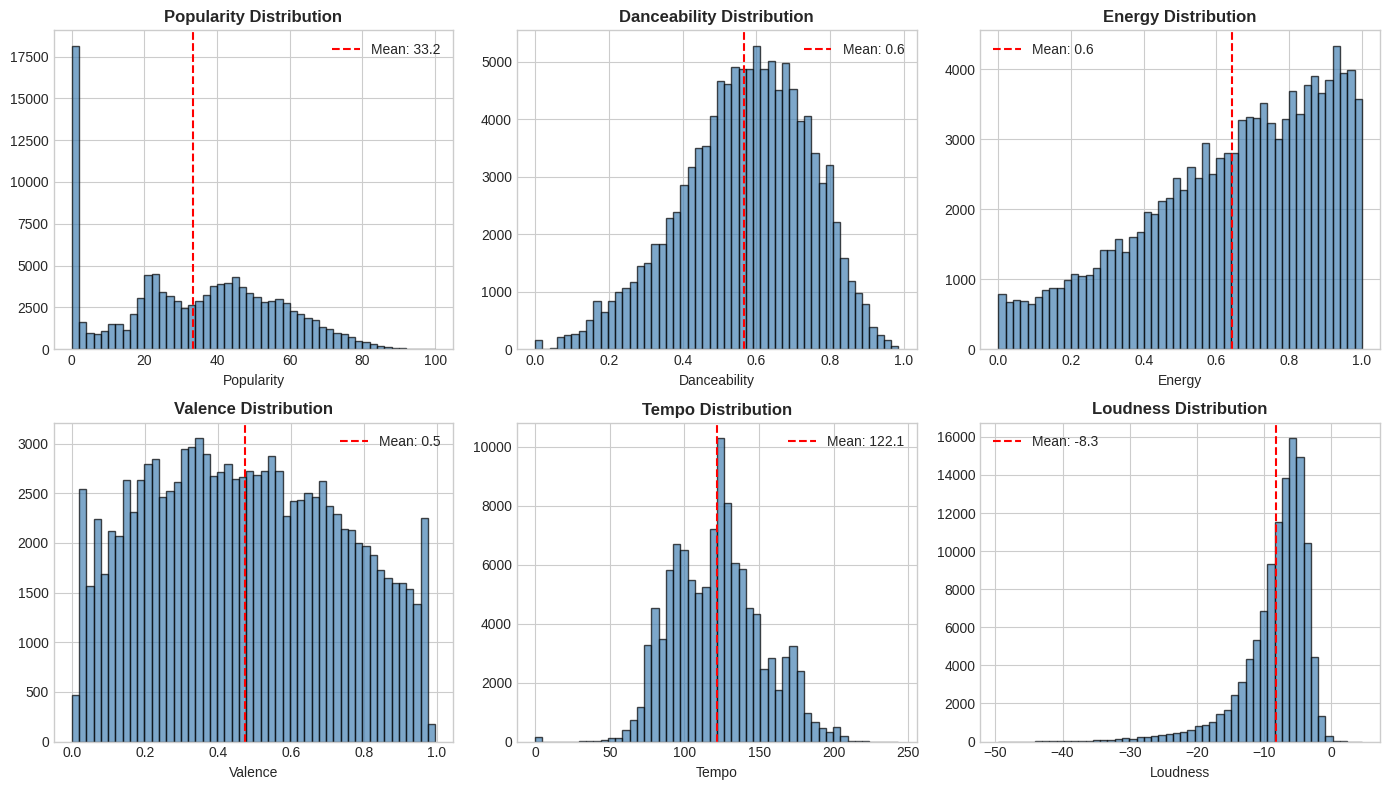

In [47]:



##OUR FEATURES
audio_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
display(df[audio_features].describe().round(3))


##CRITICAL COLUMN WE ARE TRYING TO PREDICT THIS FOR FUTURE SONGS - POPULARITY
pop = df['popularity']
print(f"  • Average popularity: {pop.mean():.1f}/100")


fig, axes = plt.subplots(2, 3, figsize=(14, 8))


key_features =['popularity', 'danceability', 'energy', 'valence', 'tempo', 'loudness']

for idx, feature in enumerate(key_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    ax.hist(df[feature], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(df[feature].mean(), color='red', linestyle='--', label=f'Mean: {df[feature].mean():.1f}')
    ax.set_xlabel(feature.capitalize())
    ax.set_title(f'{feature.capitalize()} Distribution', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.savefig('visuals/FILENAME1.png', dpi=300, bbox_inches='tight')
plt.show()





  Mean:     33.24
  Median:   35.00
  Std Dev:  22.31


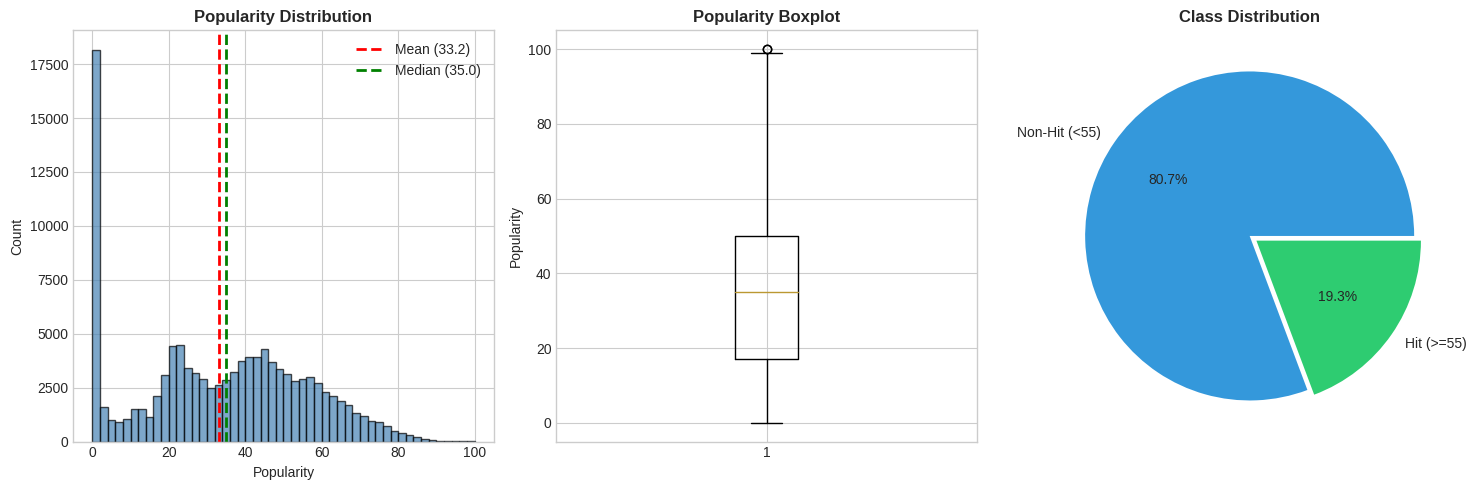

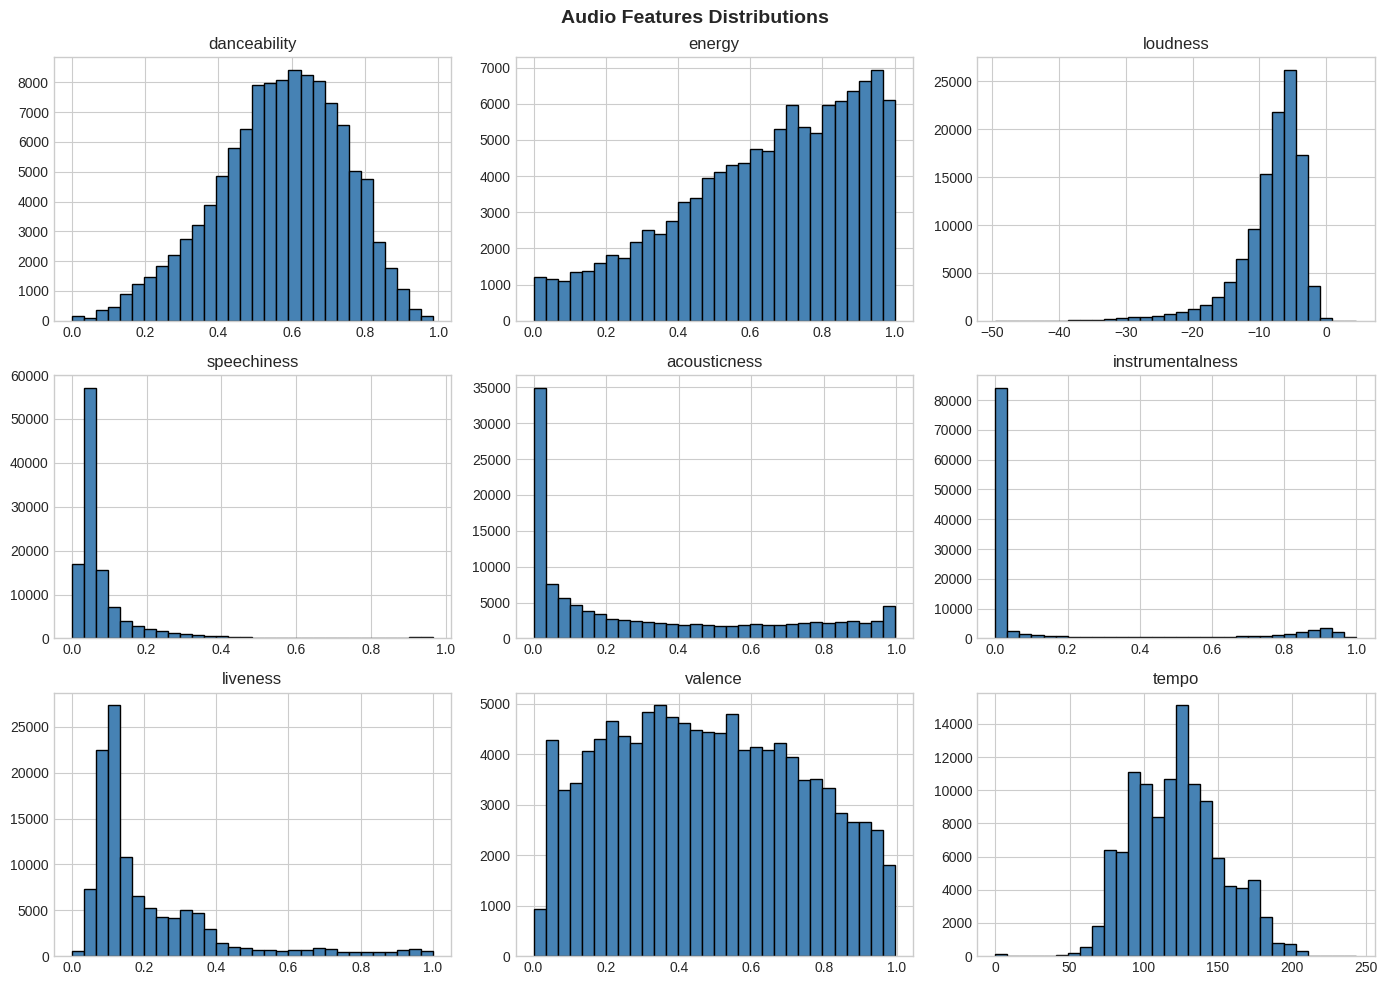

In [48]:

print(f"  Mean:     {pop.mean():.2f}")
print(f"  Median:   {pop.median():.2f}")
print(f"  Std Dev:  {pop.std():.2f}")



## FOR OUR TARGET- POPULARITY

pop = df['popularity']

hits = (pop >= 55).sum()
non_hits = (pop < 55).sum()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(pop, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(pop.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean ({pop.mean():.1f})')
axes[0].axvline(pop.median(), color='green', linestyle='--', linewidth=2, label=f'Median ({pop.median():.1f})')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Count')
axes[0].set_title('Popularity Distribution', fontweight='bold')
axes[0].legend()

axes[1].boxplot(pop, vert=True)
axes[1].set_ylabel('Popularity')
axes[1].set_title('Popularity Boxplot', fontweight='bold')

axes[2].pie([non_hits, hits], labels=['Non-Hit (<55)', 'Hit (>=55)'], autopct='%1.1f%%',
            colors=['#3498db', '#2ecc71'], explode=[0, 0.05])
axes[2].set_title('Class Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig('visuals/FILENAME2.png', dpi=300, bbox_inches='tight')
plt.show()




audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df[audio_features].hist(bins=30, figsize=(14, 10), color='steelblue', edgecolor='black')
plt.suptitle('Audio Features Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visuals/FILENAME3.png', dpi=300, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


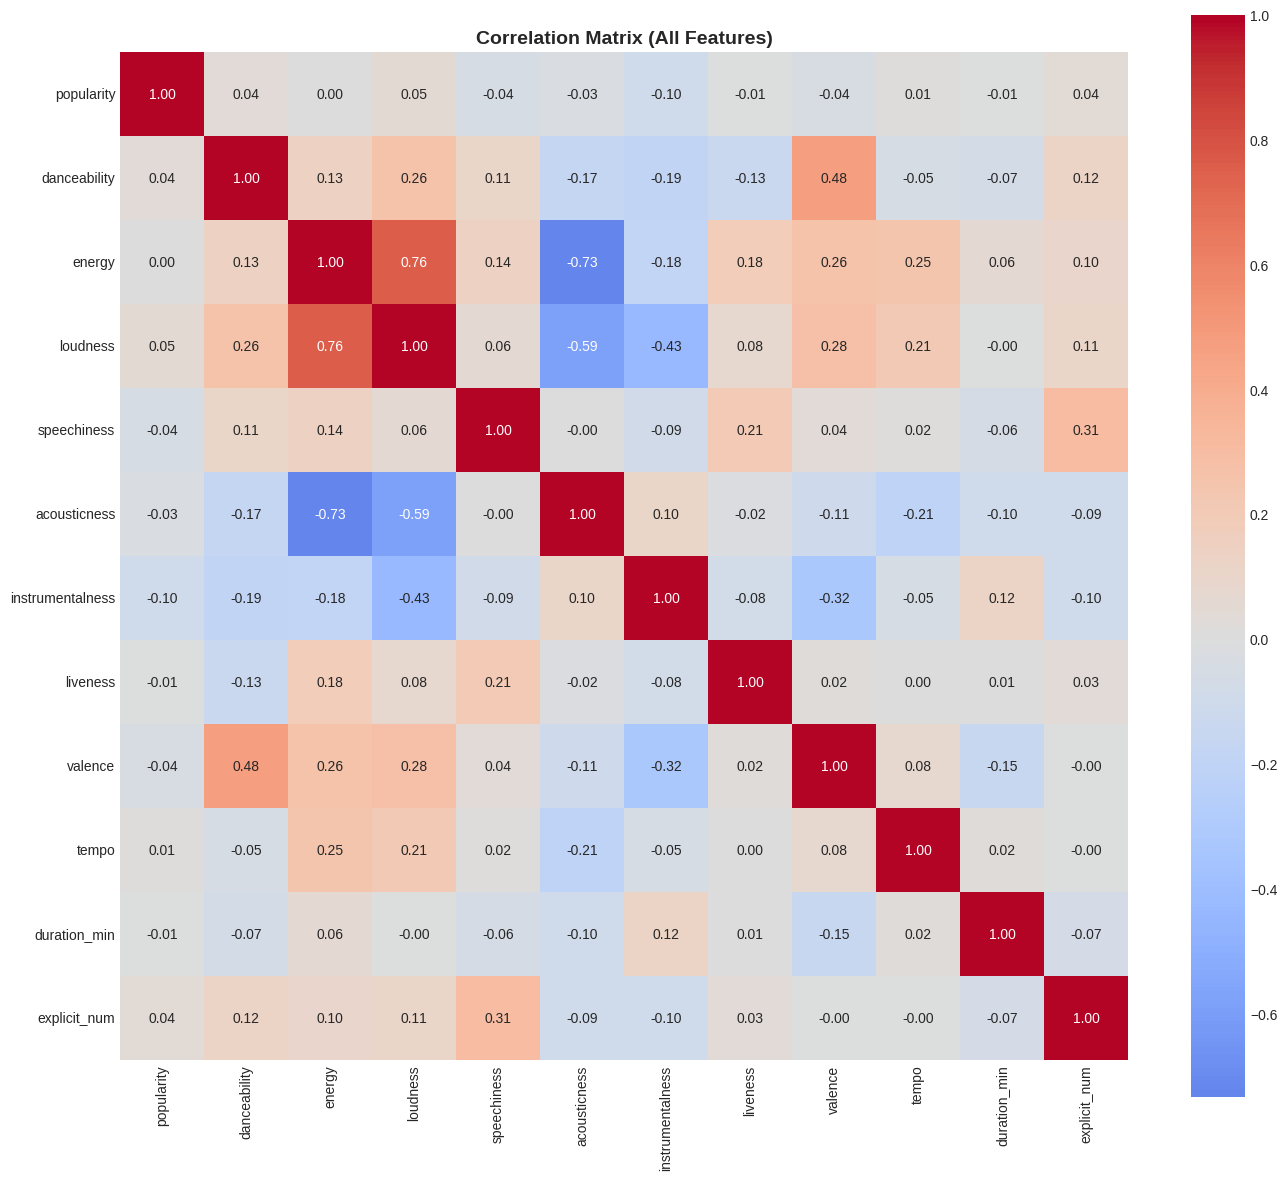

  loudness           +0.0504 ↑
  explicit_num       +0.0441 ↑
  danceability       +0.0354 ↑
  tempo              +0.0132 ↑
  energy             +0.0011 ↑
  liveness           -0.0054 ↓
  duration_min       -0.0071 ↓
  acousticness       -0.0255 ↓
  valence            -0.0405 ↓
  speechiness        -0.0449 ↓
  instrumentalness   -0.0951 ↓


In [49]:
##CORRELATION FOR FEATURES


df['duration_min'] = df['duration_ms'] / 60000
df['explicit_num'] = df['explicit'].astype(int)

# All features for correlation
corr_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                 'duration_min', 'explicit_num']

corr_matrix = df[corr_features].corr()

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix (All Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visuals/FILENAME4.png', dpi=300, bbox_inches='tight')
plt.show()


# Correlations with popularity

pop_corr = corr_matrix['popularity'].drop('popularity').sort_values(ascending=False)
for feature, corr in pop_corr.items():
    direction = "↑" if corr > 0 else "↓"
    print(f"  {feature:18} {corr:+.4f} {direction}")

  danceability            0.562        0.588      +0.0257 ↑
  energy                  0.642        0.637      -0.0056 ↓
  loudness               -8.364       -7.819      +0.5456 ↑
  speechiness             0.087        0.076      -0.0105 ↓
  acousticness            0.322        0.285      -0.0366 ↓
  instrumentalness        0.171        0.095      -0.0754 ↓
  liveness                0.221        0.181      -0.0400 ↓
  valence                 0.475        0.469      -0.0062 ↓
  tempo                 122.391      121.132      -1.2586 ↓
  duration_min            3.837        3.648      -0.1883 ↓
  explicit_num            0.077        0.119      +0.0421 ↑


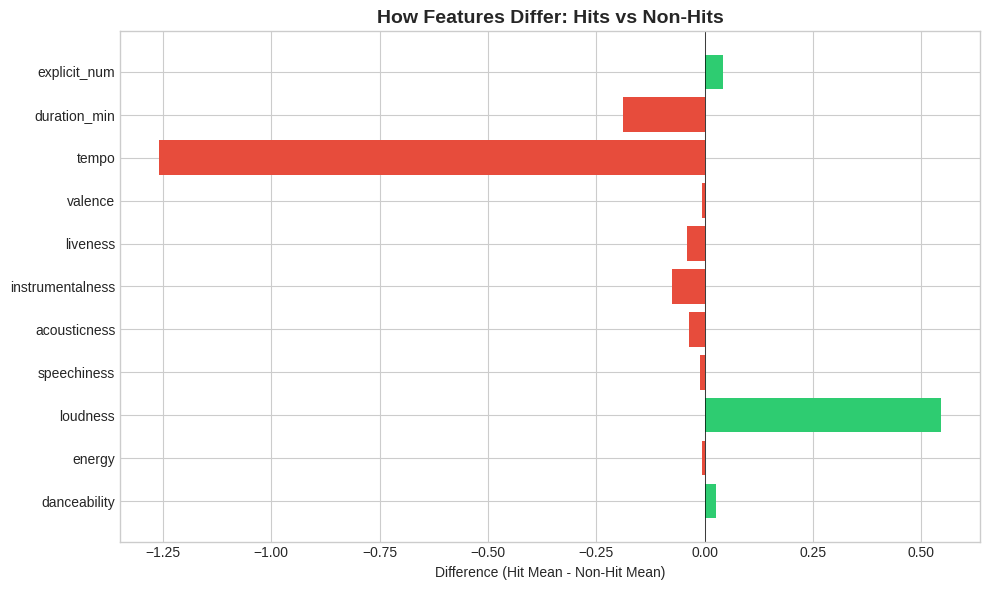

In [50]:


hits = df[df['popularity'] >= 55]
non_hits = df[df['popularity'] < 55]

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min', 
            'explicit_num']

differences = []
for feature in features:
    non_hit_mean = non_hits[feature].mean()
    hit_mean = hits[feature].mean()
    diff = hit_mean - non_hit_mean
    differences.append(diff)
    arrow = "↑" if diff > 0 else "↓"
    print(f"  {feature:<16} {non_hit_mean:>12.3f} {hit_mean:>12.3f} {diff:>+12.4f} {arrow}")

# Visualization
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if d > 0 else '#e74c3c' for d in differences]
plt.barh(features, differences, color=colors)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('Difference (Hit Mean - Non-Hit Mean)')
plt.title('How Features Differ: Hits vs Non-Hits', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('visuals/FILENAME5.png', dpi=300, bbox_inches='tight')
plt.show()





  Hit (>=55):     21,992 songs
  Non-Hit (<55):  92,008 songs
  Total:          114,000 songs


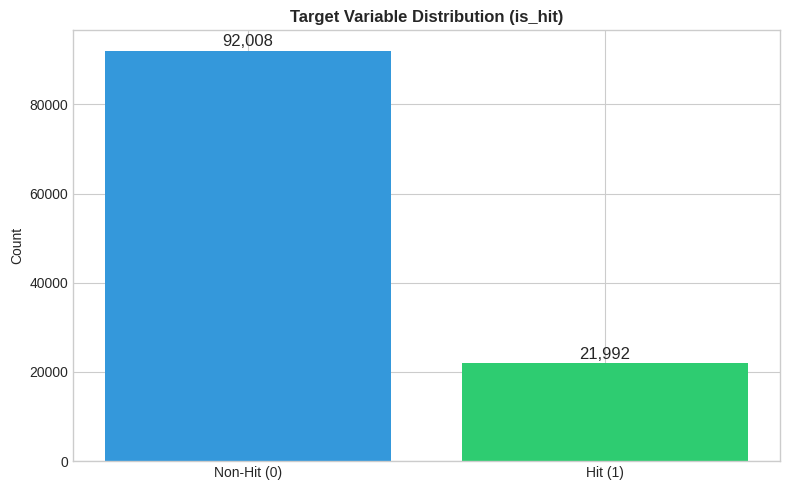

In [51]:


##TARGET CREATION

df['is_hit'] = (df['popularity'] >= 55).astype(int)
print(f"  Hit (>=55):     {df['is_hit'].sum():,} songs")
print(f"  Non-Hit (<55):  {(df['is_hit']==0).sum():,} songs")
print(f"  Total:          {len(df):,} songs")

plt.figure(figsize=(8, 5))
counts = df['is_hit'].value_counts()
plt.bar(['Non-Hit (0)', 'Hit (1)'], counts.values, color=['#3498db', '#2ecc71'])
plt.ylabel('Count')
plt.title('Target Variable Distribution (is_hit)', fontweight='bold')
for i, v in enumerate(counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('visuals/FILENAME6.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
## PRE MODEL TRAINING

## get the features
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min', 
                    'explicit_num']
target = 'is_hit'

X = df[numeric_features].copy()
y = df[target].copy()
display(X.describe().round(3))

##missing values in columns

missing = X.isnull().sum()
missing_pct = (X.isnull().sum() / len(X) * 100).round(4)


    
before = len(X)
X = X.dropna()
y = y.loc[X.index] 
after = len(X)

##no missing values

## training, test , validation data split.

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


print(f"  Training set:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"  Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.0f}%)")
print(f"  Test set:       {len(X_test):,} samples ({len(X_test)/len(X)*100:.0f}%)")



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,explicit_num
count,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000,114000.000
mean,0.567,0.641,-8.259,0.085,0.315,0.156,0.214,0.474,122.148,3.800,0.086
std,0.174,0.252,5.029,0.106,0.333,0.310,0.190,0.259,29.978,1.788,0.280
min,0.000,0.000,-49.531,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.456,0.472,-10.013,0.036,0.017,0.000,0.098,0.260,99.219,2.901,0.000
50%,0.580,0.685,-7.004,0.049,0.169,0.000,0.132,0.464,122.017,3.548,0.000
75%,0.695,0.854,-5.003,0.084,0.598,0.049,0.273,0.683,140.071,4.358,0.000
max,0.985,1.000,4.532,0.965,0.996,1.000,1.000,0.995,243.372,87.288,1.000


  Training set:   68,400 samples (60%)
  Validation set: 22,800 samples (20%)
  Test set:       22,800 samples (20%)


In [53]:
##SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numeric_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features)

print("\nBefore scaling (X_train sample):")
print(X_train.head(2).round(3))
print("\nAfter scaling (X_train_scaled sample):")
print(X_train_scaled.head(2).round(3))


Before scaling (X_train sample):
       danceability  energy  loudness  speechiness  acousticness  \
67777         0.735   0.804    -2.405        0.098         0.037   
24925         0.757   0.757    -7.903        0.051         0.171   

       instrumentalness  liveness  valence    tempo  duration_min  \
67777             0.001     0.102    0.725  175.844         3.574   
24925             0.718     0.107    0.514  138.792         5.194   

       explicit_num  
67777             0  
24925             0  

After scaling (X_train_scaled sample):
   danceability  energy  loudness  speechiness  acousticness  \
0         0.967   0.642     1.165        0.127        -0.832   
1         1.094   0.455     0.066       -0.320        -0.429   

   instrumentalness  liveness  valence  tempo  duration_min  explicit_num  
0            -0.501    -0.585    0.964  1.794        -0.123        -0.305  
1             1.825    -0.559    0.150  0.555         0.778        -0.305  


In [54]:
##IMBALANCE ISSUES.
!pip install imbalanced-learn==0.11.0 --quie
from imblearn.over_sampling import SMOTE

print("BEFORE SMOTE:")
print(f"  Non-Hits (0): {(y_train==0).sum():,}")
print(f"  Hits (1):     {(y_train==1).sum():,}")
print(f"  Ratio: {(y_train==0).sum() / (y_train==1).sum():.1f}:1")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nAFTER SMOTE:")
print(f"  Non-Hits (0): {(y_train_balanced==0).sum():,}")
print(f"  Hits (1):     {(y_train_balanced==1).sum():,}")
print(f"  Ratio: {(y_train_balanced==0).sum() / (y_train_balanced==1).sum():.1f}:1")

print(f"\nSamples added: {len(X_train_balanced) - len(X_train_scaled):,}")

BEFORE SMOTE:
  Non-Hits (0): 55,205
  Hits (1):     13,195
  Ratio: 4.2:1

AFTER SMOTE:
  Non-Hits (0): 55,205
  Hits (1):     55,205
  Ratio: 1.0:1

Samples added: 42,010


In [55]:
## GONNA USE 3 MODELS TO COMPARE AND CHOOSE THE BEST . 1) LOGISTIC REGRESSION AS BASE, 2) RANDOM FOREST, 3) GRADIENT boost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_lr = lr_model.predict(X_val_scaled)
y_val_prob_lr = lr_model.predict_proba(X_val_scaled)[:, 1]
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()

print(f"  Accuracy:  {accuracy_score(y_val, y_val_pred_lr):.4f}")
print(f"  Precision: {precision_score(y_val, y_val_pred_lr):.4f}")
print(f"  Recall:    {recall_score(y_val, y_val_pred_lr):.4f}")
print(f"  F1-Score:  {f1_score(y_val, y_val_pred_lr):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_val, y_val_prob_lr):.4f}")
print(f"\n  TP: {tp_lr}  |  TN: {tn_lr}  |  FP: {fp_lr}  |  FN: {fn_lr}")

  Accuracy:  0.5511
  Precision: 0.2448
  Recall:    0.6363
  F1-Score:  0.3535
  ROC-AUC:   0.6213

  TP: 2799  |  TN: 9765  |  FP: 8636  |  FN: 1600


In [56]:
## RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1)
rf_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_val_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]

cm_rf = confusion_matrix(y_val, y_val_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

print(f"  Accuracy:  {accuracy_score(y_val, y_val_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_val, y_val_pred_rf):.4f}")
print(f"  Recall:    {recall_score(y_val, y_val_pred_rf):.4f}")
print(f"  F1-Score:  {f1_score(y_val, y_val_pred_rf):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_val, y_val_prob_rf):.4f}")
print(f"\n  TP: {tp_rf}  |  TN: {tn_rf}  |  FP: {fp_rf}  |  FN: {fn_rf}")

  Accuracy:  0.8308
  Precision: 0.5596
  Recall:    0.5781
  F1-Score:  0.5687
  ROC-AUC:   0.8442

  TP: 2543  |  TN: 16400  |  FP: 2001  |  FN: 1856


In [57]:
##GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=250, random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)

y_val_pred_gb = gb_model.predict(X_val_scaled)
y_val_prob_gb = gb_model.predict_proba(X_val_scaled)[:, 1]

cm_gb = confusion_matrix(y_val, y_val_pred_gb)
tn_gb, fp_gb, fn_gb, tp_gb = cm_gb.ravel()

print(f"  Accuracy:  {accuracy_score(y_val, y_val_pred_gb):.4f}")
print(f"  Precision: {precision_score(y_val, y_val_pred_gb):.4f}")
print(f"  Recall:    {recall_score(y_val, y_val_pred_gb):.4f}")
print(f"  F1-Score:  {f1_score(y_val, y_val_pred_gb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_val, y_val_prob_gb):.4f}")
print(f"\n  TP: {tp_gb}  |  TN: {tn_gb}  |  FP: {fp_gb}  |  FN: {fn_gb}")

  Accuracy:  0.6216
  Precision: 0.2837
  Recall:    0.6306
  F1-Score:  0.3914
  ROC-AUC:   0.6755

  TP: 2774  |  TN: 11398  |  FP: 7003  |  FN: 1625


,Model,Accuracy,Precision,Recall,ROC-AUC
0,Random Forest,0.8370,0.5796,0.5654,0.8466
1,Gradient Boosting,0.7373,0.3302,0.3514,0.6798
2,Logistic Regression,0.5549,0.2458,0.6320,0.6221


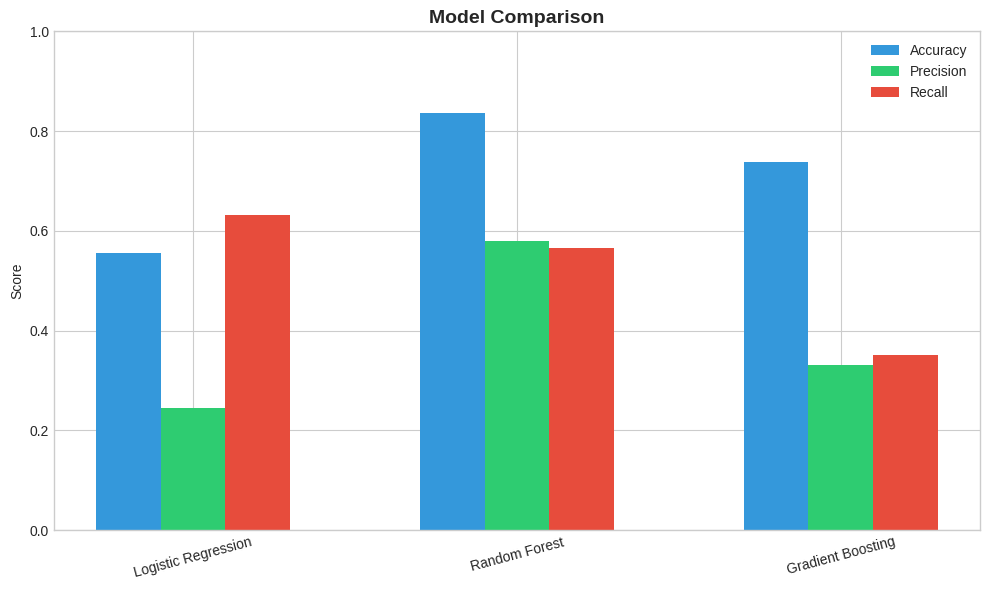

In [58]:
##tune summary 
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.5549, 0.8370, 0.7373],
    'Precision': [0.2458, 0.5796, 0.3302],
    'Recall': [0.6320, 0.5654, 0.3514],
    'ROC-AUC': [0.6221, 0.8466, 0.6798]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)
display(results_df)

# Visualize
plt.figure(figsize=(10, 6))
x = np.arange(len(results['Model']))
width = 0.2

plt.bar(x - width, results['Accuracy'], width, label='Accuracy', color='#3498db')
plt.bar(x, results['Precision'], width, label='Precision', color='#2ecc71')
plt.bar(x + width, results['Recall'], width, label='Recall', color='#e74c3c')

plt.ylabel('Score')
plt.title('Model Comparison', fontweight='bold', fontsize=14)
plt.xticks(x, results['Model'], rotation=15)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig('visuals/FILENAME7.png', dpi=300, bbox_inches='tight')
plt.show()


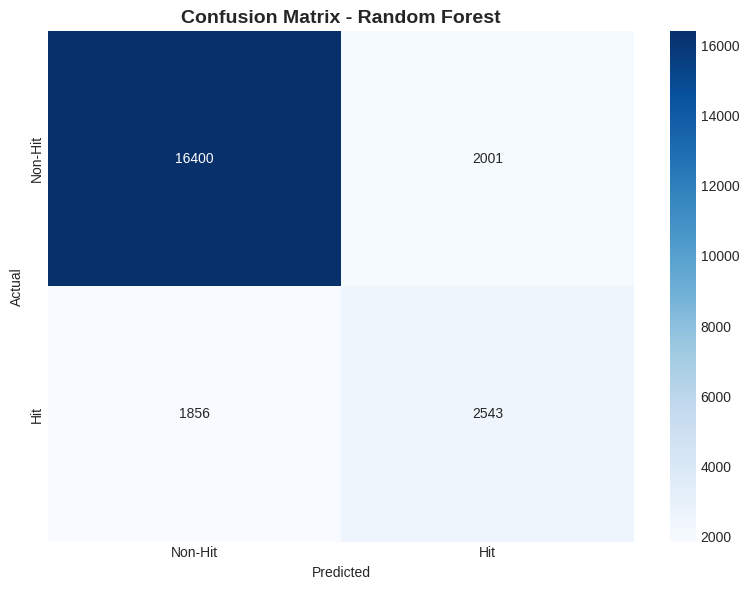

  True Negatives:  16,400 (Correctly predicted Non-Hit)
  True Positives:  2,543 (Correctly predicted Hit)
  False Positives: 2,001 (Predicted Hit, was Non-Hit)
  False Negatives: 1,856 (Predicted Non-Hit, was Hit)


In [59]:
##matrix work...

from sklearn.metrics import confusion_matrix
y_val_pred = rf_model.predict(X_val_scaled)
cm = confusion_matrix(y_val, y_val_pred)



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hit', 'Hit'],
            yticklabels=['Non-Hit', 'Hit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('visuals/FILENAME8.png', dpi=300, bbox_inches='tight')
plt.show()



tn, fp, fn, tp = cm.ravel()

print(f"  True Negatives:  {tn:,} (Correctly predicted Non-Hit)")
print(f"  True Positives:  {tp:,} (Correctly predicted Hit)")
print(f"  False Positives: {fp:,} (Predicted Hit, was Non-Hit)")
print(f"  False Negatives: {fn:,} (Predicted Non-Hit, was Hit)")

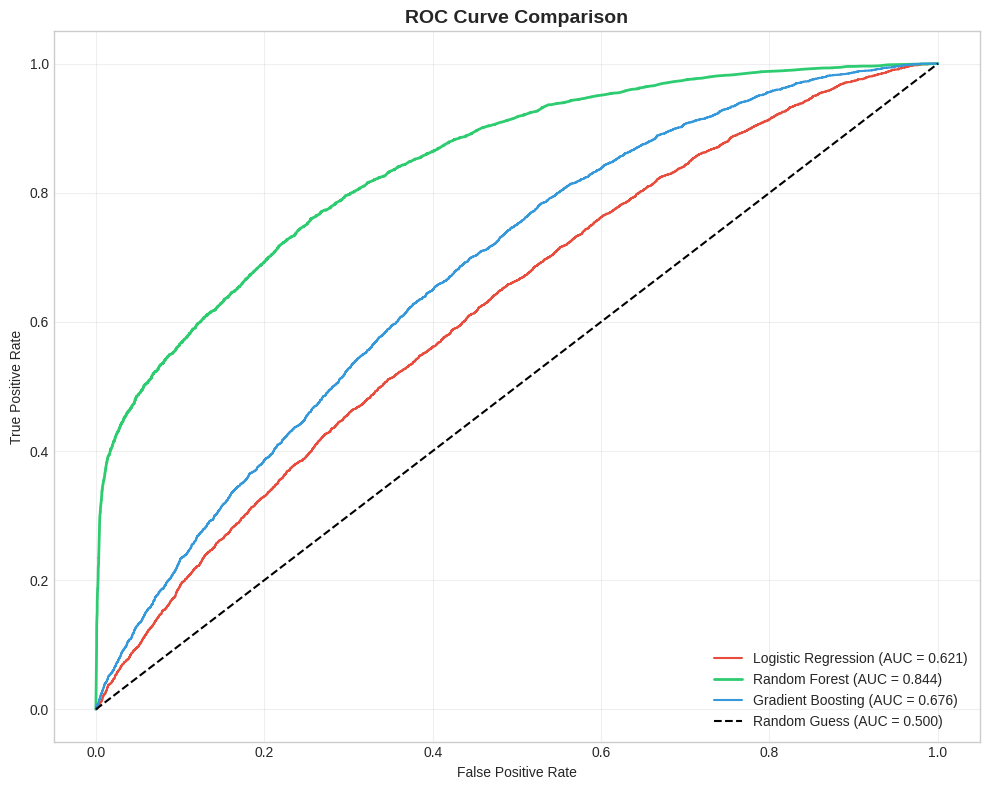

In [60]:
##ROC


from sklearn.metrics import roc_curve, roc_auc_score

lr_prob = lr_model.predict_proba(X_val_scaled)[:, 1]
rf_prob = rf_model.predict_proba(X_val_scaled)[:, 1]
gb_prob = gb_model.predict_proba(X_val_scaled)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_prob)
gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_prob)

plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, lr_prob):.3f})', color='#e74c3c')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_val, rf_prob):.3f})', color='#2ecc71', linewidth=2)
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {roc_auc_score(y_val, gb_prob):.3f})', color='#3498db')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/FILENAME9.png', dpi=300, bbox_inches='tight')
plt.show()


  Fold 1: 0.8271
  Fold 2: 0.8279
  Fold 3: 0.8313
  Fold 4: 0.8163
  Fold 5: 0.8184

  Mean ROC-AUC: 0.8242
  Std Dev:      0.0058


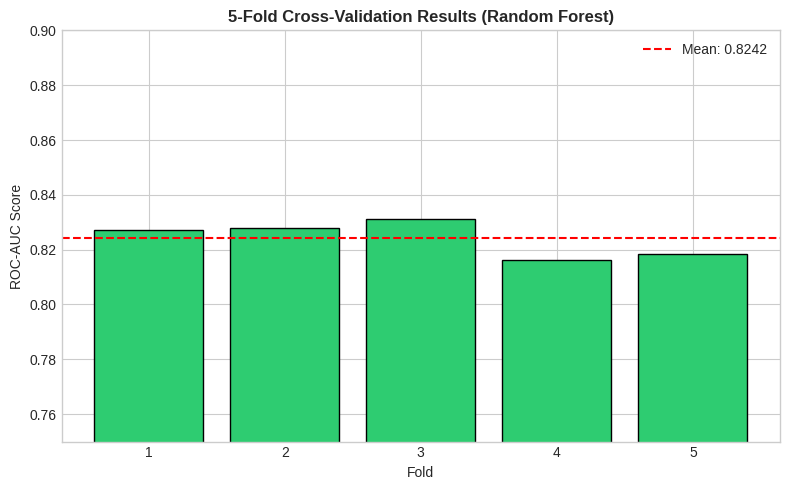

In [61]:
##CROSS-VAL, FOR RELIABILITY OF MODEL

from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_scores = cross_val_score(pipeline,X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print(f"  Fold 1: {rf_cv_scores[0]:.4f}")
print(f"  Fold 2: {rf_cv_scores[1]:.4f}")
print(f"  Fold 3: {rf_cv_scores[2]:.4f}")
print(f"  Fold 4: {rf_cv_scores[3]:.4f}")
print(f"  Fold 5: {rf_cv_scores[4]:.4f}")
print(f"\n  Mean ROC-AUC: {rf_cv_scores.mean():.4f}")
print(f"  Std Dev:      {rf_cv_scores.std():.4f}")


plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), rf_cv_scores, color='#2ecc71', edgecolor='black')
plt.axhline(y=rf_cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {rf_cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC Score')
plt.title('5-Fold Cross-Validation Results (Random Forest)', fontweight='bold')
plt.ylim(0.75, 0.90)
plt.legend()
plt.tight_layout()
plt.savefig('visuals/FILENAME10.png', dpi=300, bbox_inches='tight')
plt.show()


In [62]:
## TEST SET!! , NEVER TRAINED WITH THIS DATA BEFORE

y_test_pred = rf_model.predict(X_test_scaled)
y_test_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_test_prob):.4f}")

cm_test = confusion_matrix(y_test, y_test_pred)

cm_test



  Accuracy:  0.8282
  Precision: 0.5528
  Recall:    0.5723
  ROC-AUC:   0.8420


array([[16366,  2036],
       [ 1881,  2517]])

         Feature  Importance
    acousticness    0.106586
    duration_min    0.103998
         valence    0.102656
        liveness    0.101665
    danceability    0.098892
        loudness    0.098825
           tempo    0.098211
          energy    0.095834
instrumentalness    0.093127
     speechiness    0.091894
    explicit_num    0.008312


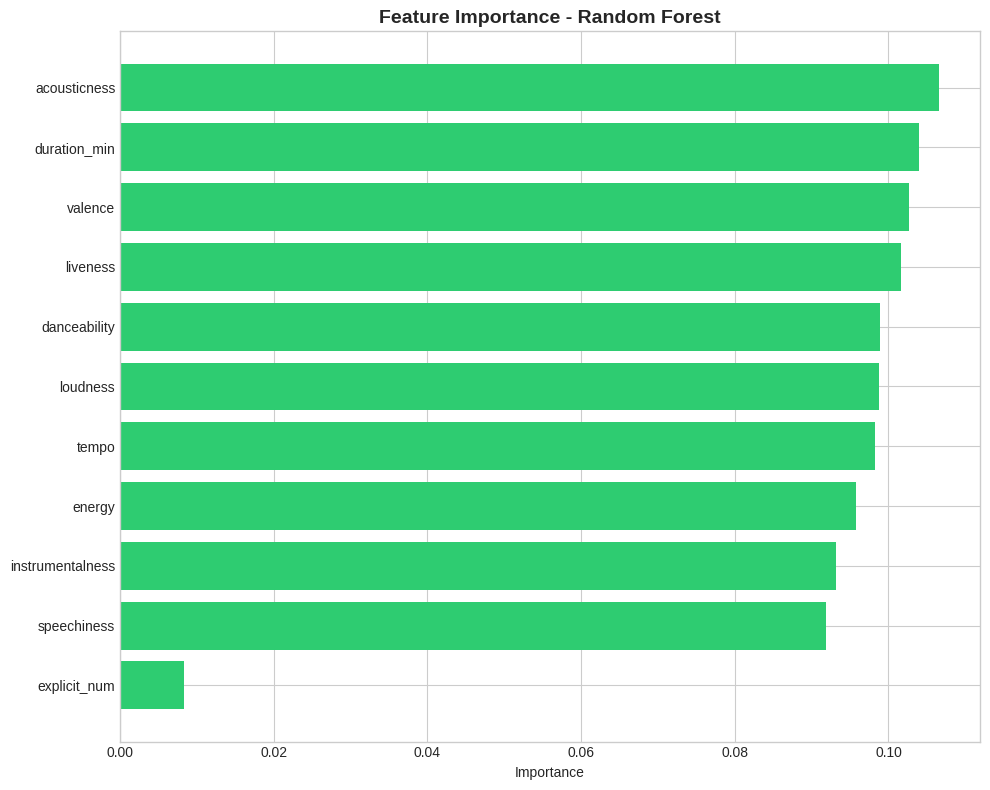

In [63]:
## but what features did the dirty work?

feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#2ecc71')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visuals/FILENAME11.png', dpi=300, bbox_inches='tight')
plt.show()


In [64]:
## TRY NEURAL NETWORK TO IMPROVE.
!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

nn_model = Sequential([
    # Input layer
    Dense(256, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Hidden layer 1
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layer 2
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model.summary()
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = nn_model.fit(
    X_train_balanced, y_train_balanced,
    epochs=150,
    batch_size=128,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,041 (90.00 KB)

 Trainable params: 22,337 (87.25 KB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5675 - loss: 0.7368 - val_accuracy: 0.5292 - val_loss: 0.6797
Epoch 2/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6089 - loss: 0.6563 - val_accuracy: 0.5449 - val_loss: 0.6684
Epoch 3/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6264 - loss: 0.6424 - val_accuracy: 0.5519 - val_loss: 0.6603
Epoch 4/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6350 - loss: 0.6349 - val_accuracy: 0.5632 - val_loss: 0.6540
Epoch 5/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6393 - loss: 0.6315 - val_accuracy: 0.5638 - val_loss: 0.6487
Epoch 6/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6427 - loss: 0.6278 - val_accuracy: 0.5733 - val_loss: 0.6419
Epoch 7/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6431 - loss: 0.6269 - val_accuracy: 0.5715 - val_loss: 0.6471
Epoch 8/150
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6483 - loss: 0.6223 - val_accu

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
  Accuracy:  0.6230
  Precision: 0.2944
  Recall:    0.6827
  F1-Score:  0.4113
  ROC-AUC:   0.6992

  TP: 3003  |  TN: 11202  |  FP: 7199  |  FN: 1396
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
  Accuracy:  0.6175
  Precision: 0.2894
  Recall:    0.6755
  F1-Score:  0.4052
  ROC-AUC:   0.7012

  TP: 2971  |  TN: 11108  |  FP: 7294  |  FN: 1427


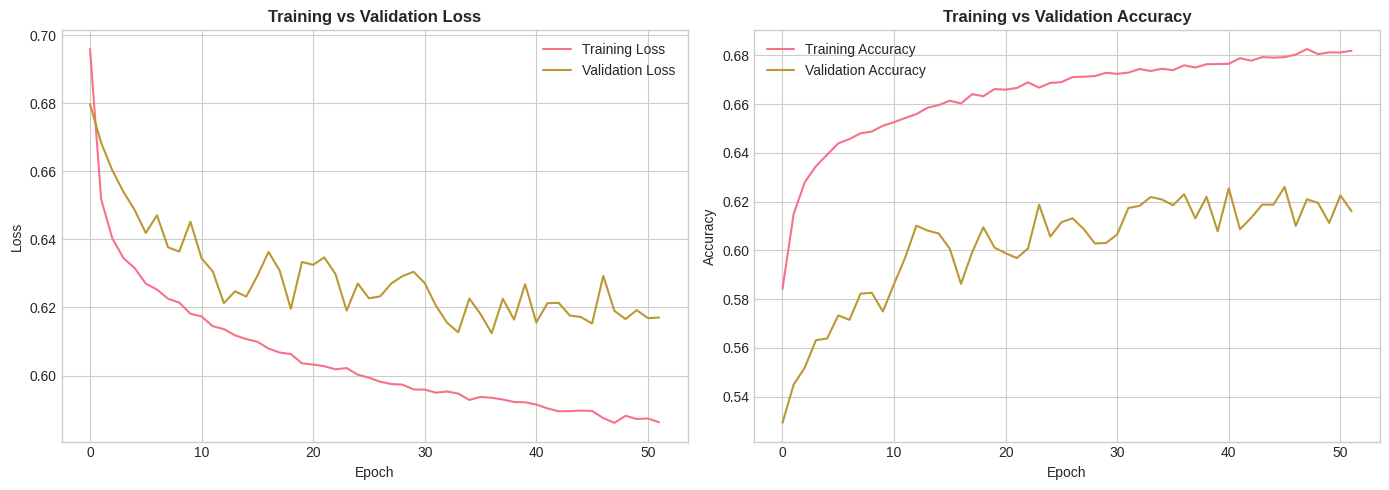

In [65]:
#NN RESULTS AND TEST SET WORK, AND CONFUSION MATRIX, AND HISTORY

y_val_pred_prob_nn = nn_model.predict(X_val_scaled).flatten()
y_val_pred_nn = (y_val_pred_prob_nn >= 0.5).astype(int)

cm_nn = confusion_matrix(y_val, y_val_pred_nn)
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()

print(f"  Accuracy:  {accuracy_score(y_val, y_val_pred_nn):.4f}")
print(f"  Precision: {precision_score(y_val, y_val_pred_nn):.4f}")
print(f"  Recall:    {recall_score(y_val, y_val_pred_nn):.4f}")
print(f"  F1-Score:  {f1_score(y_val, y_val_pred_nn):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_val, y_val_pred_prob_nn):.4f}")
print(f"\n  TP: {tp_nn}  |  TN: {tn_nn}  |  FP: {fp_nn}  |  FN: {fn_nn}")

y_test_pred_prob_nn = nn_model.predict(X_test_scaled).flatten()
y_test_pred_nn = (y_test_pred_prob_nn >= 0.5).astype(int)

cm_nn_test = confusion_matrix(y_test, y_test_pred_nn)
tn_nn_test, fp_nn_test, fn_nn_test, tp_nn_test = cm_nn_test.ravel()

print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_nn):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred_nn):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred_nn):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_test_pred_prob_nn):.4f}")
print(f"\n  TP: {tp_nn_test}  |  TN: {tn_nn_test}  |  FP: {fp_nn_test}  |  FN: {fn_nn_test}")




fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#LOSS
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss', fontweight='bold')
axes[0].legend()
#ACCURACY
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('visuals/FILENAME12.png', dpi=300, bbox_inches='tight')
plt.show()


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.8370,0.5796,0.5654,0.5724,0.8466
1,Neural Network,0.6379,0.3009,0.6628,0.4139,0.7085
2,Gradient Boosting,0.7373,0.3302,0.3514,0.3405,0.6798
3,Logistic Regression,0.5549,0.2458,0.6320,0.3539,0.6221


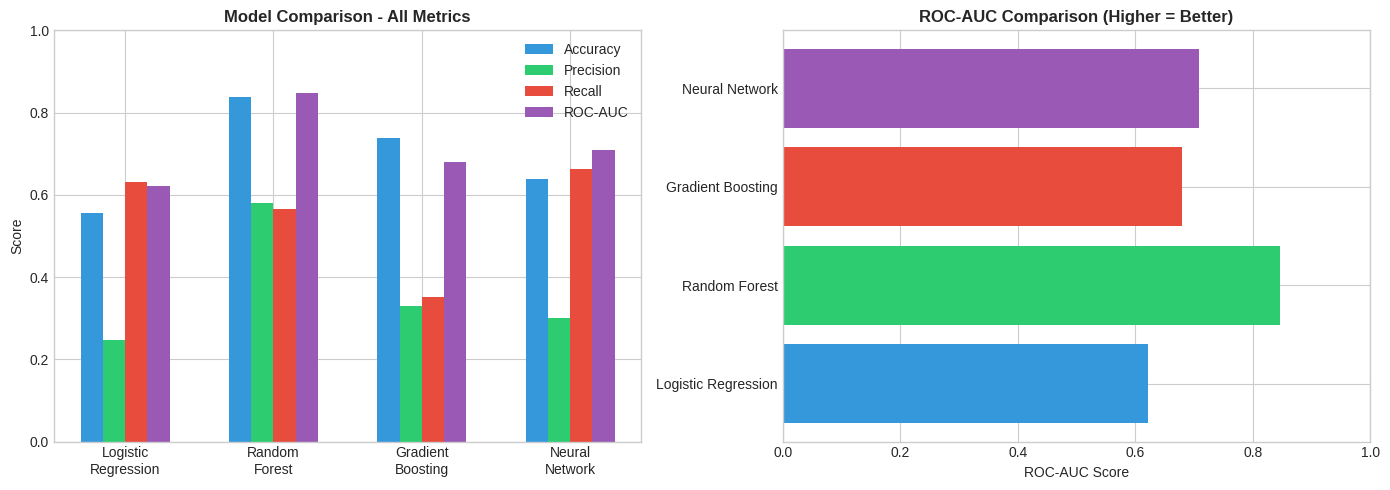

 RANDOM FOREST
   Accuracy:  83.70%  (Best)
   Precision: 57.96%  (Best)
   Recall:    56.54%  
   F1-Score:  57.24%  (Best)
   ROC-AUC:   84.66%  (Best)



In [66]:


# Results from all models
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'Accuracy': [0.5549, 0.8370, 0.7373, 0.6379],
    'Precision': [0.2458, 0.5796, 0.3302, 0.3009],
    'Recall': [0.6320, 0.5654, 0.3514, 0.6628],
    'F1-Score': [0.3539, 0.5724, 0.3405, 0.4139],
    'ROC-AUC': [0.6221, 0.8466, 0.6798, 0.7085]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print("\n")
display(results_df)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: All metrics comparison
x = np.arange(len(results['Model']))
width = 0.15

axes[0].bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy', color='#3498db')
axes[0].bar(x - 0.5*width, results['Precision'], width, label='Precision', color='#2ecc71')
axes[0].bar(x + 0.5*width, results['Recall'], width, label='Recall', color='#e74c3c')
axes[0].bar(x + 1.5*width, results['ROC-AUC'], width, label='ROC-AUC', color='#9b59b6')

axes[0].set_ylabel('Score')
axes[0].set_title('Model Comparison - All Metrics', fontweight='bold', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Logistic\nRegression', 'Random\nForest', 'Gradient\nBoosting', 'Neural\nNetwork'])
axes[0].legend(loc='upper right')
axes[0].set_ylim(0, 1)

# Plot 2: ROC-AUC comparison
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
axes[1].barh(results['Model'], results['ROC-AUC'], color=colors)
axes[1].set_xlabel('ROC-AUC Score')
axes[1].set_title('ROC-AUC Comparison (Higher = Better)', fontweight='bold', fontsize=12)
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.savefig('visuals/FILENAME13.png', dpi=300, bbox_inches='tight')
plt.show()


#winner


print(f""" RANDOM FOREST
   Accuracy:  83.70%  (Best)
   Precision: 57.96%  (Best)
   Recall:    56.54%  
   F1-Score:  57.24%  (Best)
   ROC-AUC:   84.66%  (Best)
""")

In [67]:
y_test_pred_lr = lr_model.predict(X_test_scaled)
y_test_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest (already done)
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Gradient Boosting
y_test_pred_gb = gb_model.predict(X_test_scaled)
y_test_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Neural Network (already done)
y_test_pred_prob_nn = nn_model.predict(X_test_scaled).flatten()

# Print all results
print("TEST SET RESULTS")
print("="*50)
print(f"Logistic Regression  ROC-AUC: {roc_auc_score(y_test, y_test_prob_lr):.4f}")
print(f"Random Forest        ROC-AUC: {roc_auc_score(y_test, y_test_prob_rf):.4f}")
print(f"Gradient Boosting    ROC-AUC: {roc_auc_score(y_test, y_test_prob_gb):.4f}")
print(f"Neural Network       ROC-AUC: {roc_auc_score(y_test, y_test_pred_prob_nn):.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
TEST SET RESULTS
Logistic Regression  ROC-AUC: 0.6203
Random Forest        ROC-AUC: 0.8420
Gradient Boosting    ROC-AUC: 0.6778
Neural Network       ROC-AUC: 0.7012
